Seoul Retail Case

Company Q has five franchise stores (A through E) located in an exclusive shopping district in Seoul, South Korea. Each store sells the same brands and items. As per guesstimates, roughly 95% of their sales come from Japanese tourists. Even though the stores bear the name of the same company, they are effectively competitors due to their close proximity to each other. The franchisee of Store B, Mr. Choe, is interested in identifying the factors that affect sales in his store and the extent to which these factors affect sales. He is also interested in identifying the similarities and dissimilarities of these impact factors across the five stores. Mr. Choe plans to use these identified factors for sales and operations planning in his store. 

To help answer his questions, Mr. Choe has collected aggregated sales data on all four stores from  September 1 2011 to March 16 2013. Here are the variables which are captured in the dataset:

Store ID
Store Name
Number of Customers
Number of Items Sold
Total Sales
Discount: This is the subset of Total Sales and reflects the proceeds from any items sold at a discount.
Average Sales per Customer
Average Sales per Item
Date
Day of week (weekends are thought to be better for business than weekdays)
Distances from Metro Stations X and Y (in meters and feet)
Distance from the nearest main thoroughfare (in meters and feet)

In addition, Mr. Choe was also able to collect data on the total number of Japanese tourists that visited Seoul. However, this data is available only from Feb 14 2012. Further, note that not all of these tourists might have visited Company Q’s retail stores. There might, however, be some correlation between the number of such tourists and some of the variables included in the dataset. Also, there may be differences across stores – for instance, the number of Japanese tourists may have a larger bearing on Store A’s revenues than on Store B’s.

Further, since most of the customers are Japanese, the currency exchange rates may affect their buying habits. The JPY (Japanese Yen)/KRW (Korean Won) ratio is provided for each day in the dataset. 

Also, such tourists may be more likely to visit during Japanese national holidays. This effect may be more heightened if the holiday happens to fall on a Friday or a Monday, as it then implies an extended weekend vacation. The binary variable Holiday is set to 1 if the day is part of a holiday weekend such that a Japanese holiday falls on either a Friday or a Monday; otherwise, it is set to zero. For example, if there was a holiday on Friday March 2, 2012, then the binary variable for March 2, 3 and 4 is set to 1. Likewise, if the holiday falls on Monday March 5, the binary variable for March 3, 4 and 5 is set to 1. 

Weather may also play a role in the shopping behavior. People may be more likely to shop and spend under certain weather conditions than others. For this purpose, the following data were collected: Actual High Temperature and Outlook (whether it was sunny, cloudy, rainy, snowy, etc). 

Store A closed on March 17 2012 and reopened at the same location under new ownership on June 19 2012. 

Store C closed on March 17 2012 and reopened at a different location under new ownership on September 2 2012.

Mr. Choe would like to know more about the factors that affect sales in each store and the importance of such factors. In writing your report to Mr. Choe, assume that he is a non-technical person and communicate your findings and analysis accordingly. 


In [35]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('D:\Data\korea_data.csv')

In [36]:
data.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,Year,Weekday,Distance from Station X(Meter),Distance from Station X(Feet),Distance from Station Y(Meter),Distance from Station Y(Feet),Distance from Main Street(Meter),Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
0,20002,Store A,289,2528,19579200,0,67748,7745,9/1/2011,9,2011,Thursday,250,820,500,1640,220,722,13.93,0,87,NaN,NaN
1,20002,Store A,230,2404,20031700,0,87094,8333,9/2/2011,9,2011,Friday,250,820,500,1640,220,722,13.83,0,89,NaN,NaN
2,20002,Store A,244,2018,20681800,0,84761,10249,9/3/2011,9,2011,Saturday,250,820,500,1640,220,722,13.83,0,87,Cloudy,NaN
3,20002,Store A,230,1875,21673500,0,94233,11559,9/4/2011,9,2011,Sunday,250,820,500,1640,220,722,13.85,0,84,Cloudy,NaN
4,20002,Store A,306,2327,21652200,0,70759,9305,9/5/2011,9,2011,Monday,250,820,500,1640,220,722,13.85,0,82,Sunny,NaN


In [37]:
data.shape

(2547, 23)

In [38]:
data.columns.tolist()

['Code',
 'Store Name',
 '# of Customers',
 '# of Items',
 'Total Sales',
 'Discount',
 'Avg Sales per Customer',
 'Avg Sales per Item',
 'Date',
 'Month',
 'Year',
 'Weekday',
 'Distance from Station X(Meter)',
 'Distance from Station X(Feet)',
 'Distance from Station Y(Meter)',
 'Distance from Station Y(Feet)',
 'Distance from Main Street(Meter)',
 'Distance from Main Street(Feet)',
 'YenWonRatio',
 'Holiday',
 'ActualHighTemp',
 'Outlook',
 'Japanese Tourists']

In [39]:
data_filtered = data[[
 'Store Name',
 '# of Customers',
 '# of Items',
 'Total Sales',
 'Discount',
    'Month',
 'Weekday',
 'Distance from Station X(Meter)',
 'Distance from Station Y(Meter)',
 'Distance from Main Street(Meter)',
 'YenWonRatio',
 'Holiday',
 'ActualHighTemp',
 'Outlook',
 'Japanese Tourists']]

In [40]:
data_filtered.head()

,Store Name,# of Customers,# of Items,Total Sales,Discount,Month,Weekday,Distance from Station X(Meter),Distance from Station Y(Meter),Distance from Main Street(Meter),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
0,Store A,289,2528,19579200,0,9,Thursday,250,500,220,13.93,0,87,NaN,NaN
1,Store A,230,2404,20031700,0,9,Friday,250,500,220,13.83,0,89,NaN,NaN
2,Store A,244,2018,20681800,0,9,Saturday,250,500,220,13.83,0,87,Cloudy,NaN
3,Store A,230,1875,21673500,0,9,Sunday,250,500,220,13.85,0,84,Cloudy,NaN
4,Store A,306,2327,21652200,0,9,Monday,250,500,220,13.85,0,82,Sunny,NaN


In [41]:
stores = data_filtered['Store Name'].unique().tolist()

In [42]:
for i in range(5):
    print(stores[i],data_filtered[(data_filtered['Discount'].values <0) & (data_filtered['Store Name'] == stores[i])].shape[0])

('Store A', 7)
('Store B', 17)
('Store C', 1)
('Store D', 13)
('Store E', 0)


In [43]:
data_filtered.head()

,Store Name,# of Customers,# of Items,Total Sales,Discount,Month,Weekday,Distance from Station X(Meter),Distance from Station Y(Meter),Distance from Main Street(Meter),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
0,Store A,289,2528,19579200,0,9,Thursday,250,500,220,13.93,0,87,NaN,NaN
1,Store A,230,2404,20031700,0,9,Friday,250,500,220,13.83,0,89,NaN,NaN
2,Store A,244,2018,20681800,0,9,Saturday,250,500,220,13.83,0,87,Cloudy,NaN
3,Store A,230,1875,21673500,0,9,Sunday,250,500,220,13.85,0,84,Cloudy,NaN
4,Store A,306,2327,21652200,0,9,Monday,250,500,220,13.85,0,82,Sunny,NaN


In [44]:
data_filtered.isnull().sum().sort_values(ascending = False)

Japanese Tourists                   1165
Outlook                              355
ActualHighTemp                         0
Holiday                                0
YenWonRatio                            0
Distance from Main Street(Meter)       0
Distance from Station Y(Meter)         0
Distance from Station X(Meter)         0
Weekday                                0
Month                                  0
Discount                               0
Total Sales                            0
# of Items                             0
# of Customers                         0
Store Name                             0
dtype: int64

In [45]:
data['Outlook'].value_counts()

Sunny     1018
Rainy      431
Cloudy     384
Snowy      213
cloudy      74
rainy       72
Name: Outlook, dtype: int64

In [46]:
data_filtered['Outlook'][data_filtered['Outlook'] == 'rainy'] = 'Rainy'

data_filtered['Outlook'][data_filtered['Outlook'] == 'cloudy'] = 'Cloudy'

In [47]:
data_filtered['Outlook'].fillna(data_filtered['Outlook'].mode()[0],inplace = True)

In [48]:
data_filtered = data_filtered[['Store Name',
 'Discount',
     'Month',
 'Weekday',
 'YenWonRatio',
 'Holiday',
 'ActualHighTemp',
 'Outlook',
 'Japanese Tourists',
    'Total Sales']]

In [49]:
data_filtered = data_filtered[data_filtered['Japanese Tourists'].isnull() != True]

In [50]:
data_filtered.head()

,Store Name,Discount,Month,Weekday,YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists,Total Sales
153,Store A,0,2,Wednesday,14.71,0,20,Sunny,3168.0,21726050
154,Store A,0,2,Thursday,14.75,0,16,Sunny,2743.0,21019300
155,Store A,0,2,Friday,14.71,0,30,Snowy,2841.0,22036800
156,Store A,52500,2,Saturday,14.63,0,35,Sunny,4267.0,20776900
157,Store A,0,2,Sunday,14.51,0,40,Sunny,4626.0,22610900


In [51]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 153 to 2506
Data columns (total 10 columns):
Store Name           1382 non-null object
Discount             1382 non-null int64
Month                1382 non-null int64
Weekday              1382 non-null object
YenWonRatio          1382 non-null float64
Holiday              1382 non-null int64
ActualHighTemp       1382 non-null int64
Outlook              1382 non-null object
Japanese Tourists    1382 non-null float64
Total Sales          1382 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 118.8+ KB


In [52]:
data_filtered['SalesOnDiscPerc'] =(data_filtered['Discount']/data_filtered['Total Sales'])*100

In [53]:
data_filtered['SalesOnDiscPerc'] = data_filtered['SalesOnDiscPerc'].astype('int64')

In [54]:
data_filtered.head()

,Store Name,Discount,Month,Weekday,YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists,Total Sales,SalesOnDiscPerc
153,Store A,0,2,Wednesday,14.71,0,20,Sunny,3168.0,21726050,0
154,Store A,0,2,Thursday,14.75,0,16,Sunny,2743.0,21019300,0
155,Store A,0,2,Friday,14.71,0,30,Snowy,2841.0,22036800,0
156,Store A,52500,2,Saturday,14.63,0,35,Sunny,4267.0,20776900,0
157,Store A,0,2,Sunday,14.51,0,40,Sunny,4626.0,22610900,0


In [55]:
data_filtered.columns.tolist()

['Store Name',
 'Discount',
 'Month',
 'Weekday',
 'YenWonRatio',
 'Holiday',
 'ActualHighTemp',
 'Outlook',
 'Japanese Tourists',
 'Total Sales',
 'SalesOnDiscPerc']

In [56]:
data_filtered = data_filtered[['Store Name',
 'Month',
 'Weekday',
 'YenWonRatio',
 'Holiday',
 'ActualHighTemp',
 'Outlook',
 'Japanese Tourists',
 'SalesOnDiscPerc', 'Total Sales'
]]

In [57]:
storeB = data_filtered[data_filtered['Store Name'] == 'Store B']
storeA = data_filtered[data_filtered['Store Name'] == 'Store A']
storeC = data_filtered[data_filtered['Store Name'] == 'Store C']
storeD = data_filtered[data_filtered['Store Name'] == 'Store D']
storeE = data_filtered[data_filtered['Store Name'] == 'Store E']


In [58]:
storeA.to_csv('storeA.csv', sep=',',index = False) 
storeB.to_csv('storeB.csv', sep=',',index = False) 
storeC.to_csv('storeC.csv', sep=',',index = False) 
storeD.to_csv('storeD.csv', sep=',',index = False) 
storeE.to_csv('storeE.csv', sep=',',index = False) 

In [19]:
for i in range(5):
    print(stores[i],data[data['Store Name'] == stores[i]]['Distance from Station Y(Meter)'].unique())

('Store A', array([500], dtype=int64))
('Store B', array([550], dtype=int64))
('Store C', array([550, 500], dtype=int64))
('Store D', array([300], dtype=int64))
('Store E', array([600], dtype=int64))


In [20]:
data.columns

Index([u'Code', u'Store Name', u'# of Customers', u'# of Items',
       u'Total Sales', u'Discount', u'Avg Sales per Customer',
       u'Avg Sales per Item', u'Date', u'Month', u'Year', u'Weekday',
       u'Distance from Station X(Meter)', u'Distance from Station X(Feet)',
       u'Distance from Station Y(Meter)', u'Distance from Station Y(Feet)',
       u'Distance from Main Street(Meter)', u'Distance from Main Street(Feet)',
       u'YenWonRatio', u'Holiday', u'ActualHighTemp', u'Outlook',
       u'Japanese Tourists'],
      dtype='object')

In [21]:
a = data['Distance from Station X(Meter)'].unique()

In [22]:
data['Distance from Station Y(Meter)'].unique()

array([500, 550, 300, 600], dtype=int64)

In [26]:
a = [500, 550,550, 300, 600]

In [23]:
b = [500, 550, 550,300, 600]


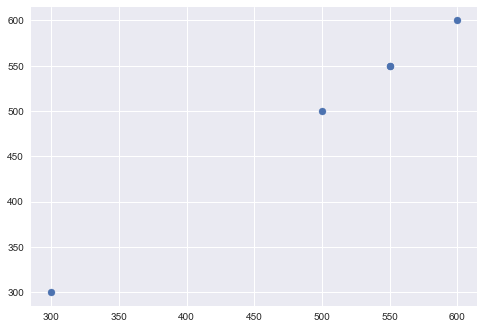

In [28]:
plt.scatter(x = a,y = b)

In [30]:
data_filtered.groupby(['Store Name','Holiday'])['Total Sales'].sum().unstack().T

Store Name,Store A,Store B,Store C,Store D,Store E
Holiday,,,,,
0,4500561262,2745899677,1235255950,3181331083,454290359
1,393131000,248504250,100452800,316238150,45693200


In [31]:
data_filtered.head()

,Store Name,Discount,Month,Weekday,YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists,Total Sales
153,Store A,0,2,Wednesday,14.71,0,20,Sunny,3168.0,21726050
154,Store A,0,2,Thursday,14.75,0,16,Sunny,2743.0,21019300
155,Store A,0,2,Friday,14.71,0,30,Snowy,2841.0,22036800
156,Store A,52500,2,Saturday,14.63,0,35,Sunny,4267.0,20776900
157,Store A,0,2,Sunday,14.51,0,40,Sunny,4626.0,22610900


In [32]:
data_filtered['Outlook'].value_counts()

Sunny     681
Rainy     334
Cloudy    252
Snowy     115
Name: Outlook, dtype: int64

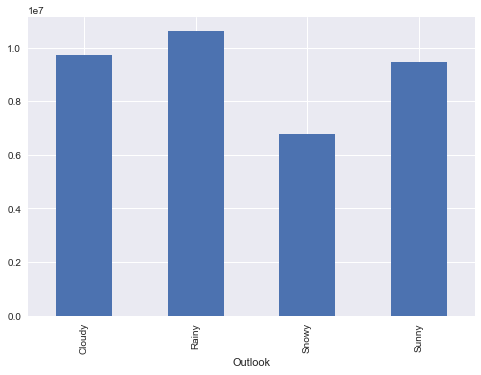

In [33]:
data_filtered.groupby(['Outlook'])['Total Sales'].mean().plot(kind = 'bar')

In [34]:
stores

['Store A', 'Store B', 'Store C', 'Store D', 'Store E']

In [35]:
data_filtered.groupby(['Store Name','Outlook'])['Total Sales'].mean().unstack(level = 0)['Store A'].values

array([ 19274671.32608696,  19949600.98591549,  13345825.2173913 ,
        18566518.13821138])

In [36]:
data_filtered.groupby(['Store Name','Outlook'])['Total Sales'].mean().unstack(level = 0)

Store Name,Store A,Store B,Store C,Store D,Store E
Outlook,,,,,
Cloudy,1.927467e+07,1.018898e+07,6.588592e+06,1.148003e+07,1.737250e+06
Rainy,1.994960e+07,1.024787e+07,7.919704e+06,1.260424e+07,1.631086e+06
Snowy,1.334583e+07,5.791707e+06,5.832760e+06,7.655976e+06,1.331349e+06
Sunny,1.856652e+07,9.621905e+06,7.358130e+06,1.125361e+07,1.578320e+06


In [37]:
data_filtered.groupby(['Store Name'])['Total Sales'].sum().sort_values(ascending = False)

Store Name
Store A    4893692262
Store D    3497569233
Store B    2994403927
Store C    1335708750
Store E     499983559
Name: Total Sales, dtype: int64

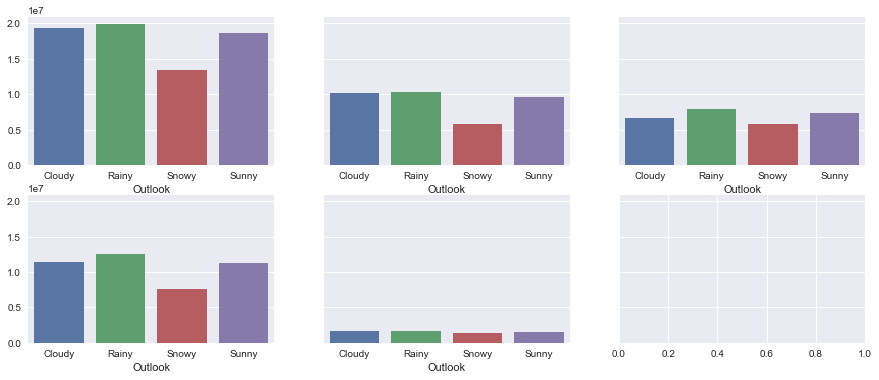

In [38]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k',sharey=True)
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(5):
#     sns.barplot(data = data_filtered[data_filtered['Store Name'] == stores[i]].groupby(['Outlook'])['Total Sales'].mean(),ax=axs[i])
    sns.barplot(x = data_filtered.groupby(['Store Name','Outlook'])['Total Sales'].mean().unstack(level = 0)[stores[i]].index,ax = axs[i],y = data_filtered.groupby(['Store Name','Outlook'])['Total Sales'].mean().unstack(level = 0)[stores[i]].values)
#     axs[i].plot(kind = 'bar',)


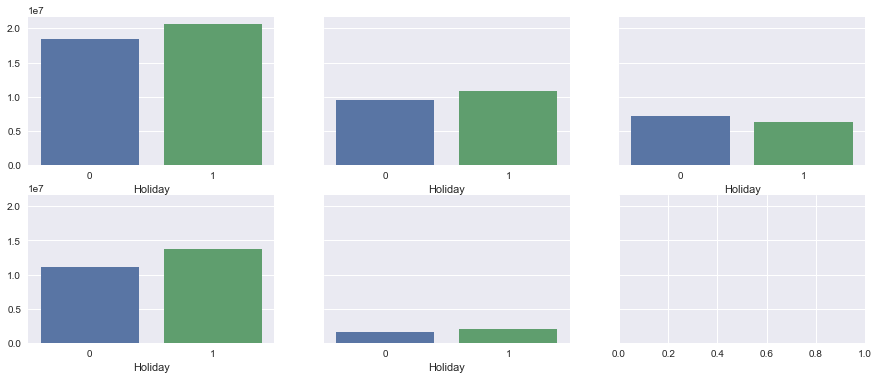

In [39]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k',sharey=True)
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(5):
#     sns.barplot(data = data_filtered[data_filtered['Store Name'] == stores[i]].groupby(['Outlook'])['Total Sales'].mean(),ax=axs[i])
    sns.barplot(x = data_filtered.groupby(['Store Name','Holiday'])['Total Sales'].mean().unstack(level = 0)[stores[i]].index,ax = axs[i],y = data_filtered.groupby(['Store Name','Holiday'])['Total Sales'].mean().unstack(level = 0)[stores[i]].values)
#     axs[i].plot(kind = 'bar',)


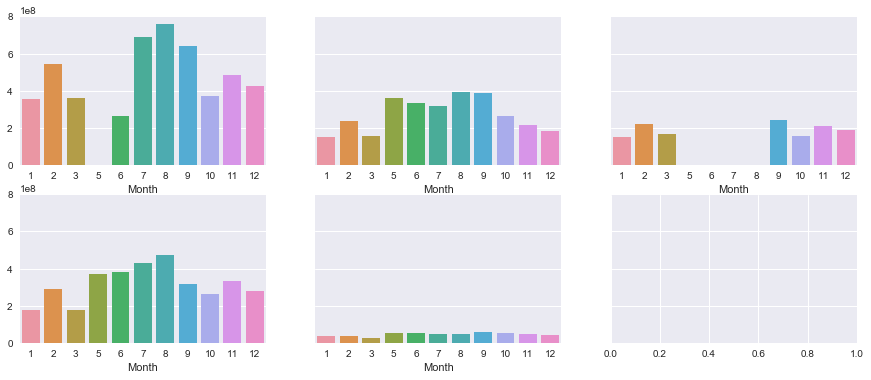

In [40]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k',sharey=True)
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(5):
#     sns.barplot(data = data_filtered[data_filtered['Store Name'] == stores[i]].groupby(['Outlook'])['Total Sales'].mean(),ax=axs[i])
    sns.barplot(x = data_filtered.groupby(['Store Name','Month'])['Total Sales'].sum().unstack(level = 0)[stores[i]].index,ax = axs[i],y = data_filtered.groupby(['Store Name','Month'])['Total Sales'].sum().unstack(level = 0)[stores[i]].values)
#     axs[i].plot(kind = 'bar',)


In [41]:
# storeB_JT['Outlook'][storeB_JT['Outlook'] == 'rainy'] = 'Rainy'

# storeB_JT['Outlook'][storeB_JT['Outlook'] == 'cloudy'] = 'Cloudy'

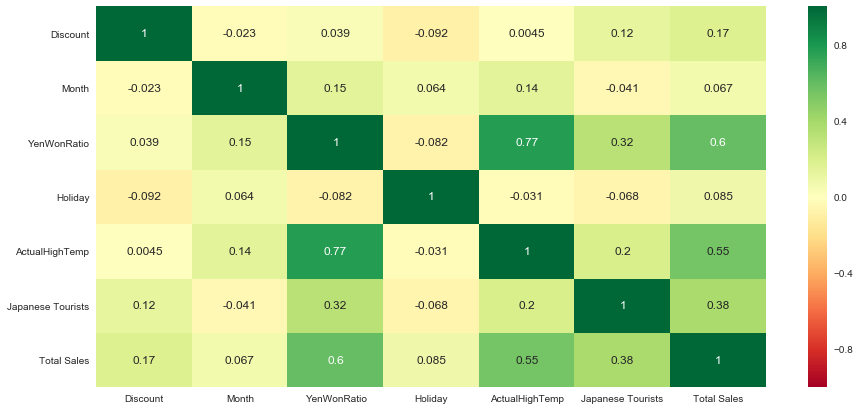

In [43]:
# most correlated features
import seaborn as sns
corrmat = storeB.corr()
plt.figure(figsize = (15,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
# top_corr_features = corrmat.index[abs(corrmat["Total Sales"])>0.1]
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
# g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

#g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

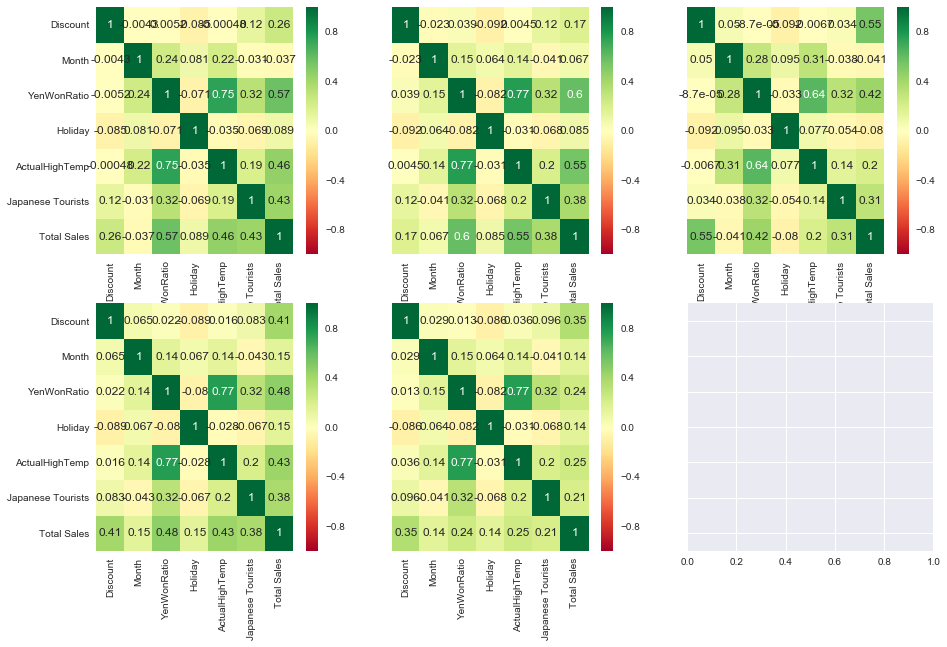

In [44]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k',sharey=True)
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(5):
#     sns.barplot(data = data_filtered[data_filtered['Store Name'] == stores[i]].groupby(['Outlook'])['Total Sales'].mean(),ax=axs[i])
    corrmat = data_filtered[data_filtered['Store Name'] == stores[i]].corr()

    g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn",ax = axs[i])

#     axs[i].plot(kind = 'bar',)


In [45]:
data.shape

(2547, 23)

In [46]:
data[data['Discount'].values <0].shape

(38, 23)

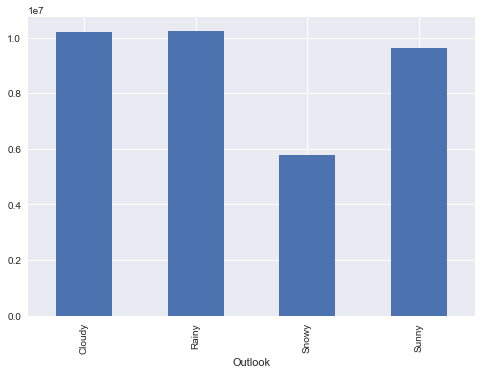

In [47]:
storeB.groupby(['Outlook']).mean()['Total Sales'].plot(kind = 'bar')

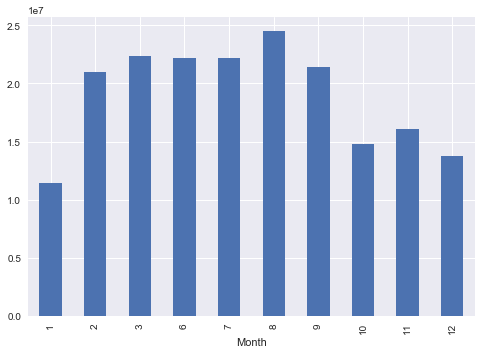

In [49]:
storeA.groupby(['Month']).mean()['Total Sales'].plot(kind = 'bar')